# Template Notebook

## Setup

### Standard library imports

In [2]:
%load_ext autoreload

In [228]:
import sys
import warnings
import logging

sys.path.append('../..')
warnings.filterwarnings('ignore')
logger = logging.getLogger(__name__)

### Imports

In [292]:
%autoreload 2

from typing import Callable, Iterable, Union

import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
from matplotlib import pyplot as plt
from sklearn import metrics
from scipy import special, stats
from tqdm import tqdm

from source.estimators.orthogonal import OrthogonalEstimator

### Paths

In [230]:
def real_m(x, alpha=1):
    return (np.abs(x) < 1) * (alpha * np.power(x, 2)) + 1 * (np.abs(x) < 2) * (np.abs(x) >= 1)

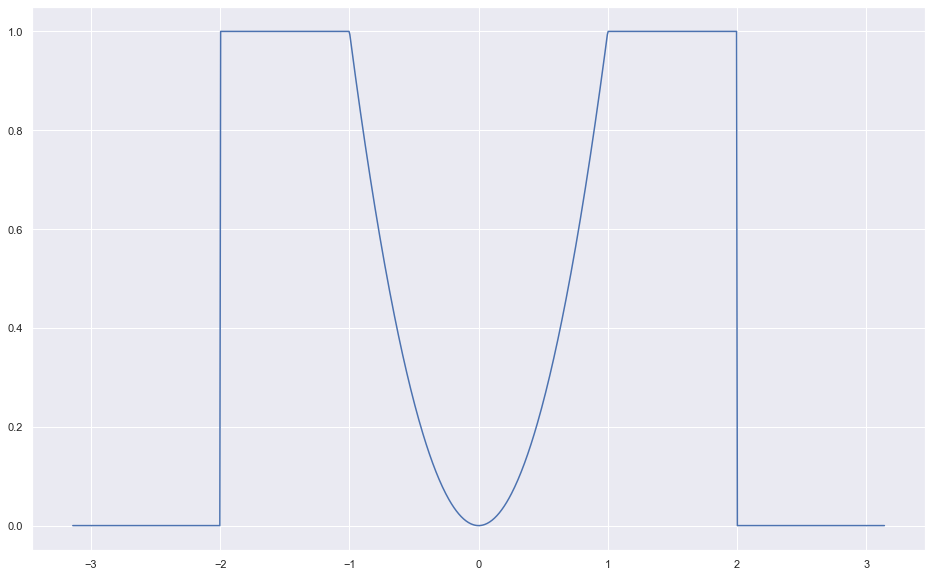

In [231]:
figure = plt.figure(figsize=[16, 10])
x = np.linspace(-np.pi, np.pi, 1000)
_ = plt.plot(x, real_m(x))

In [232]:
estimator = OrthogonalEstimator(basis="cosine", n_functions=5)

In [245]:
x = stats.uniform.rvs(size=1000, scale=2*np.pi) - np.pi
y = real_m(x) + stats.norm.rvs(size=1000, scale=0.05)

In [249]:
estimator.fit(x, y)

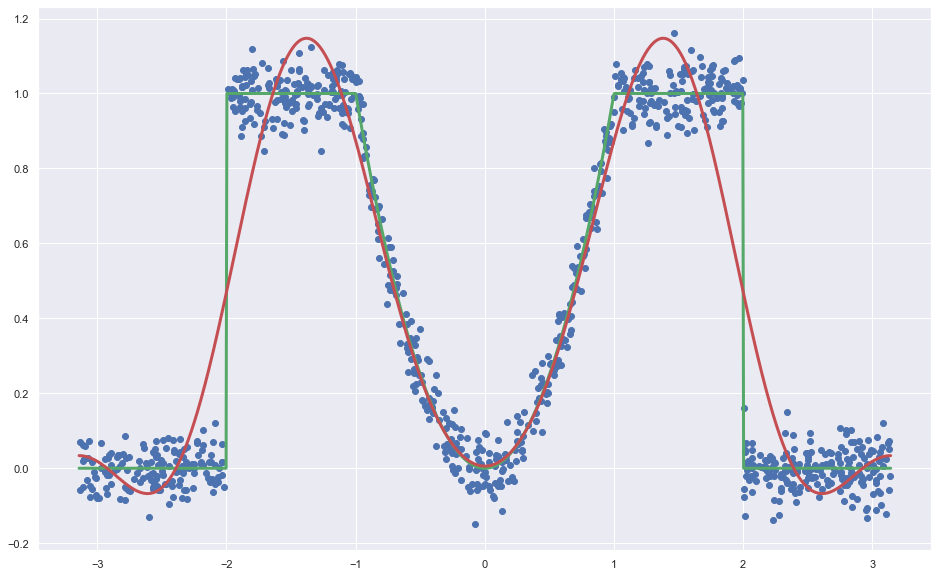

In [250]:
figure = plt.figure(figsize=[16, 10])
t = np.linspace(-np.pi, np.pi, 1000)
_ = plt.scatter(x, y)
_ = plt.plot(t, real_m(t), c="g", linewidth=3)
_ = plt.plot(t, estimator.predict(t), c="r", linewidth=3)

In [254]:
t = np.linspace(-np.pi, np.pi, 1000)

for n_functions in [1, 2, 4, 8, 12, 16, 24, 32, 40, 48, 64, 128, 256]:
    estimator = OrthogonalEstimator(basis="cosine", n_functions=n_functions)
    estimator.fit(x, y)
    print(f"N: {n_functions} MSE: {metrics.mean_squared_error(y_true=real_m(t), y_pred=estimator.predict(t)):.2E} R2: {metrics.r2_score(y_true=real_m(t), y_pred=estimator.predict(t)):.2f}")

N: 1 MSE: 2.02E-01 R2: -0.00
N: 2 MSE: 1.86E-01 R2: 0.08
N: 4 MSE: 2.98E-02 R2: 0.85
N: 8 MSE: 1.39E-02 R2: 0.93
N: 12 MSE: 8.84E-03 R2: 0.96
N: 16 MSE: 7.65E-03 R2: 0.96
N: 24 MSE: 5.33E-03 R2: 0.97
N: 32 MSE: 3.50E-03 R2: 0.98
N: 40 MSE: 3.74E-03 R2: 0.98
N: 48 MSE: 2.61E-03 R2: 0.99
N: 64 MSE: 2.62E-03 R2: 0.99
N: 128 MSE: 1.64E-03 R2: 0.99
N: 256 MSE: 3.86E+00 R2: -18.10


In [256]:
results = []
for n_functions in np.linspace(1, 250, 100):
    estimator = OrthogonalEstimator(basis="cosine", n_functions=int(n_functions))
    estimator.fit(x, y)
    results.append(metrics.mean_squared_error(y_true=real_m(t), y_pred=estimator.predict(t)))

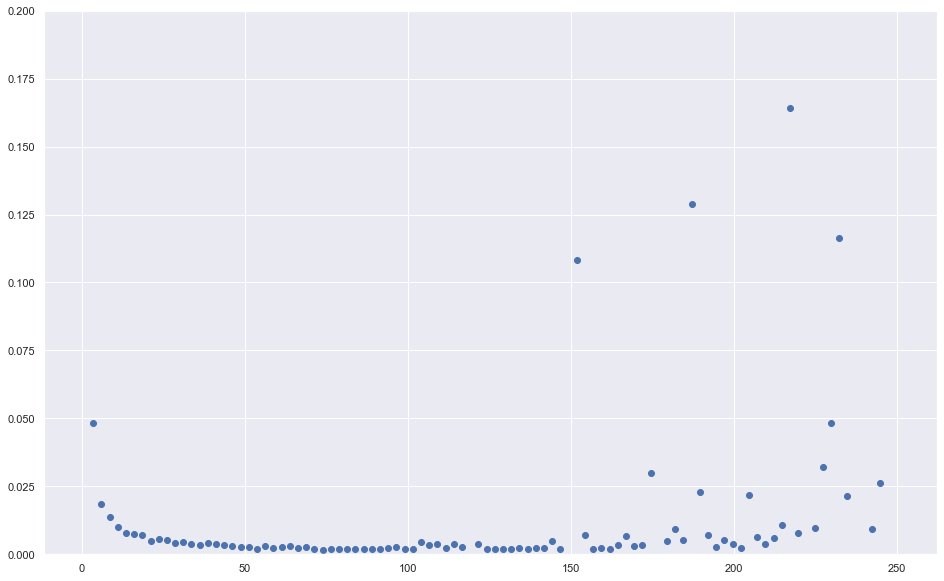

In [260]:
figure = plt.figure(figsize=[16, 10])

_ = plt.scatter(np.linspace(1, 250, 100), results)
_ = plt.ylim([0, 0.2])

In [267]:
print(f"{int(np.linspace(1, 250, 100)[np.argmin(results)])} {np.min(results):.2E}")
print(f"{int(np.linspace(1, 250, 100)[np.argmax(results)])} {np.max(results):.2E}")

73 1.58E-03
247 4.14E+00


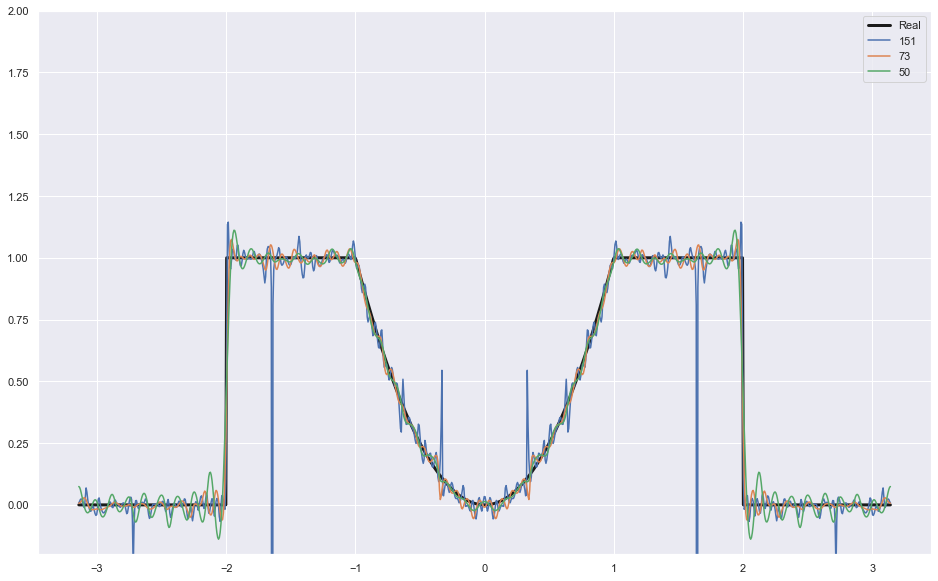

In [275]:
figure = plt.figure(figsize=[16, 10])

t = np.linspace(-np.pi, np.pi, 1000)
_ = plt.plot(t, real_m(t), c="k", linewidth=3)
for n_functions in [151, 73, 50]:
    estimator = OrthogonalEstimator(basis="cosine", n_functions=int(n_functions))
    estimator.fit(x, y)
    _ = plt.plot(t, estimator.predict(t))
    
_ = plt.legend(["Real", "151", "73", "50"])
_ = plt.ylim([-0.2, 2])

In [283]:
x = stats.uniform.rvs(size=1000, scale=2*np.pi) - np.pi
y = real_m(x) + 2 * real_m(x)*stats.norm.rvs(size=1000, scale=0.05)

In [289]:
t = np.linspace(-np.pi, np.pi, 1000)

for n_functions in [1, 2, 4, 8, 12, 16, 24, 32, 40, 48, 64, 128, 256]:
    estimator = OrthogonalEstimator(basis="cosine", n_functions=n_functions)
    estimator.fit(x, y)
    print(f"N: {n_functions} MSE: {metrics.mean_squared_error(y_true=real_m(t), y_pred=estimator.predict(t)):.2E} R2: {metrics.r2_score(y_true=real_m(t), y_pred=estimator.predict(t)):.2f}")

N: 1 MSE: 2.02E-01 R2: -0.00
N: 2 MSE: 1.83E-01 R2: 0.10
N: 4 MSE: 2.61E-02 R2: 0.87
N: 8 MSE: 1.28E-02 R2: 0.94
N: 12 MSE: 8.61E-03 R2: 0.96
N: 16 MSE: 6.18E-03 R2: 0.97
N: 24 MSE: 6.19E-03 R2: 0.97
N: 32 MSE: 3.86E-03 R2: 0.98
N: 40 MSE: 2.61E-03 R2: 0.99
N: 48 MSE: 3.16E-03 R2: 0.98
N: 64 MSE: 2.16E-03 R2: 0.99
N: 128 MSE: 2.83E-03 R2: 0.99
N: 256 MSE: 3.07E-02 R2: 0.85


In [287]:
estimator = OrthogonalEstimator(basis="cosine", n_functions=64)
estimator.fit(x, y)

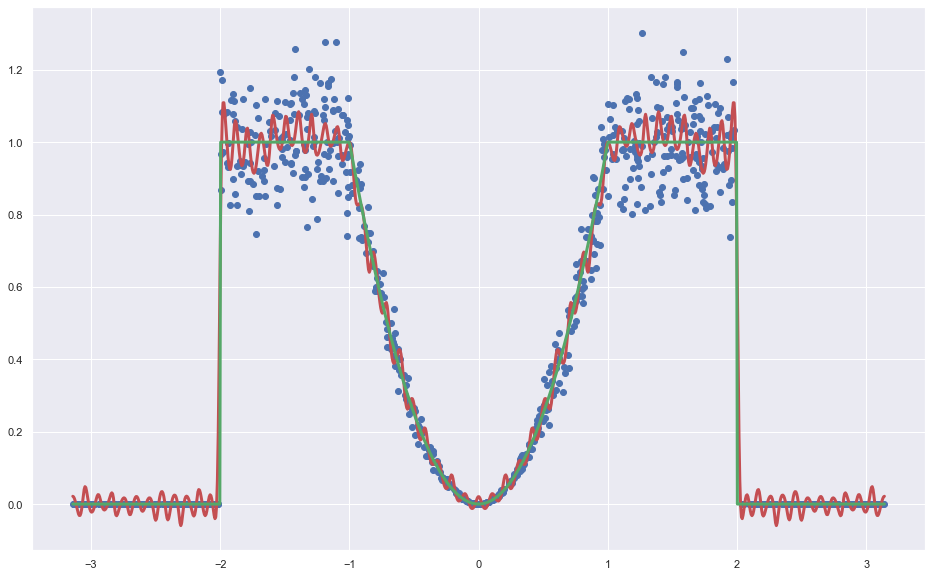

In [288]:
figure = plt.figure(figsize=[16, 10])

t = np.linspace(-np.pi, np.pi, 1000)
_ = plt.scatter(x, y)

_ = plt.plot(t, estimator.predict(t), c="r", linewidth=3)
_ = plt.plot(t, real_m(t), c="g", linewidth=3)

In [294]:
special.chebyt(n=2)(5.0)

49.0